## Titanic Analysis Exercises

This notebook solves 10 analytical questions on the Titanic dataset using pandas, seaborn, and matplotlib. Uses seaborn's built-in Titanic dataset for analysis.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline

# Load Titanic dataset using seaborn's built-in dataset
df = sns.load_dataset('titanic')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

df.head()

Dataset shape: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Quick data overview

In [2]:
# Basic structure
print(df.info())

# Descriptive statistics for numeric features
display(df.describe())

# Missing values per column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# df['age'] = df['age'].fillna(df['age'].mode()[0])
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [4]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

## 1. Survival rate by passenger class
How does survival rate differ between passenger classes (1st, 2nd, 3rd)?

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


C:\Users\prani\AppData\Local\Temp\ipykernel_40268\3904534219.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = df.groupby('pclass')['survived'].mean().sort_index()


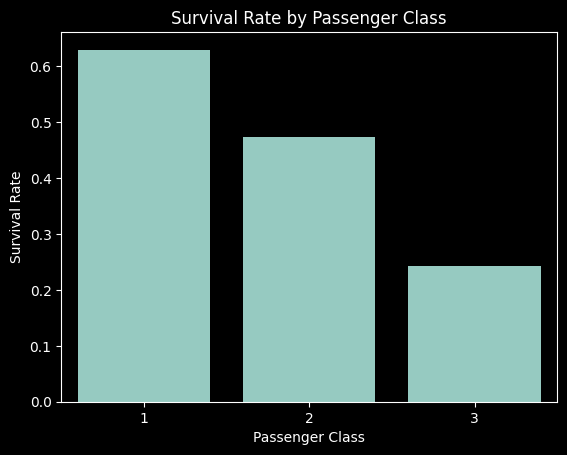

In [5]:
# Ensure Pclass is treated as categorical
df['pclass'] = df['pclass'].astype('category')

# Survival rate by class
class_survival = df.groupby('pclass')['survived'].mean().sort_index()
print(class_survival)

# Optional visualization
sns.barplot(x=class_survival.index, y=class_survival.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

## 2. Gender bias in survival
Calculate survival rates for males vs. females, then compare to overall survival rate.

In [6]:
# Survival rate by gender
gender_survival = df.groupby('sex')['survived'].mean()
print('Survival rate by gender:')
print(gender_survival)

# Overall survival rate
overall_survival = df['survived'].mean()
print('Overall survival rate:', overall_survival)

# Add comparison in a small table
comparison = gender_survival.to_frame('SurvivalRate')
comparison.loc['Overall'] = overall_survival
comparison

Survival rate by gender:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
Overall survival rate: 0.3838383838383838


,SurvivalRate
sex,
female,0.742038
male,0.188908
Overall,0.383838


## 3. Missing cabin class analysis
How many passengers without a cabin survived vs. those with cabin information?

In [7]:
# Create a flag for cabin information
df['HasCabin'] = df['deck'].notna()

# Count passengers by HasCabin and Survived
cabin_counts = df.groupby(['HasCabin', 'survived']).size().unstack(fill_value=0)
print('Counts of passengers by cabin availability and survival:')
print(cabin_counts)

# Survival rate depending on cabin info
cabin_survival_rate = df.groupby('HasCabin')['survived'].mean()
print('Survival rate by cabin availability:')
print(cabin_survival_rate)

Counts of passengers by cabin availability and survival:
survived    0    1
HasCabin          
True      549  342
Survival rate by cabin availability:
HasCabin
True    0.383838
Name: survived, dtype: float64


## 4. Family size impact
Create a `FamilySize` feature (SibSp + Parch + 1) and analyze its relationship with survival.

Correlation between FamilySize and Survived: 0.01663898928274529


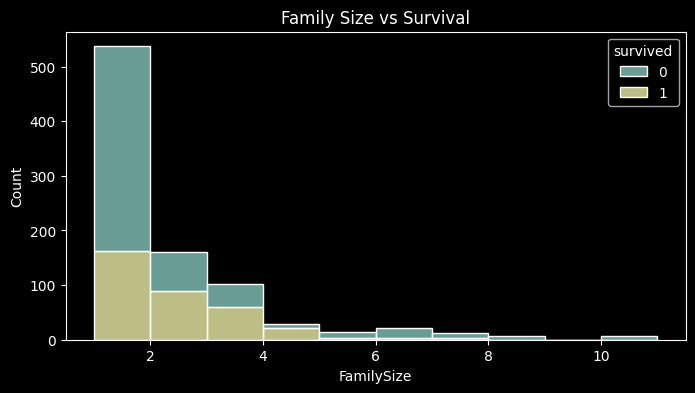

In [8]:
# Feature engineering: FamilySize
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Correlation with survival
corr_family_survived = df['FamilySize'].corr(df['survived'])
print('Correlation between FamilySize and Survived:', corr_family_survived)

# Visualize distribution of FamilySize by survival
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='FamilySize', hue='survived', multiple='stack', bins=10)
plt.title('Family Size vs Survival')
plt.show()

## 5. Age distribution of survivors vs non-survivors
Generate age distributions for survivors and non-survivors.

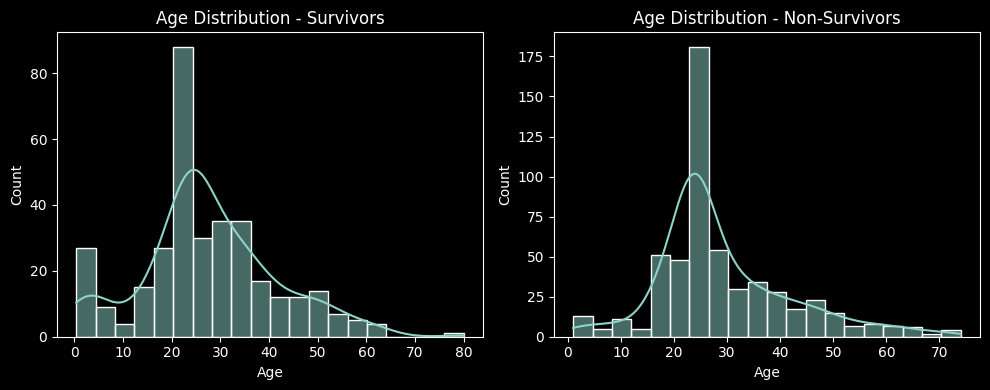

In [9]:
# Drop rows with missing Age for this analysis
age_df = df.dropna(subset=['age'])

plt.figure(figsize=(10, 4))

# Survivors
plt.subplot(1, 2, 1)
sns.histplot(age_df[age_df['survived'] == 1]['age'], bins=20, kde=True)
plt.title('Age Distribution - Survivors')
plt.xlabel('Age')

# Non-survivors
plt.subplot(1, 2, 2)
sns.histplot(age_df[age_df['survived'] == 0]['age'], bins=20, kde=True)
plt.title('Age Distribution - Non-Survivors')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

## 6. Embarkation port analysis
Calculate survival rates per embarkation port (C, Q, S).

Survival rate by embarkation port:
embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.339009
Name: survived, dtype: float64


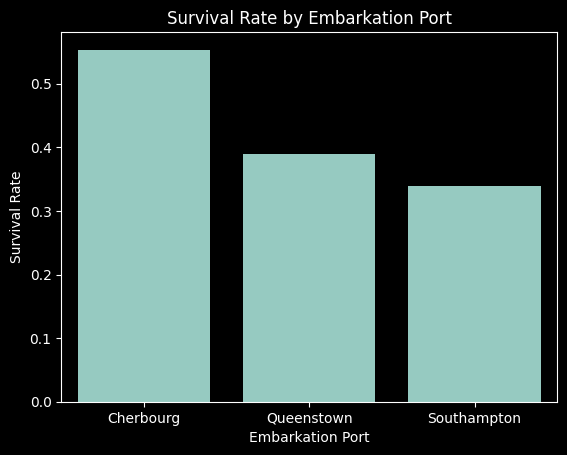

In [10]:
# Handle missing Embarked values by filling with most common value
most_common_embarked = df['embark_town'].mode().iloc[0]
df['embark_town'] = df['embark_town'].fillna(most_common_embarked)

# Survival rate by Embarked
embarked_survival = df.groupby('embark_town')['survived'].mean().sort_values(ascending=False)
print('Survival rate by embarkation port:')
print(embarked_survival)

sns.barplot(x=embarked_survival.index, y=embarked_survival.values)
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarkation Port')
plt.show()

## 7. Ticket class vs survival
Analyze survival rates by passenger class (already available in dataset).

In [11]:
# Survival rate by passenger class
class_survival = df.groupby('pclass')['survived'].mean().sort_values(ascending=False)
print('Survival rate by passenger class:')
print(class_survival)

# Cross-tabulation for detailed view
class_crosstab = pd.crosstab(df['pclass'], df['survived'], margins=True, normalize='index')
print('\nCross-tabulation (proportions):')
print(class_crosstab)

Survival rate by passenger class:
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

Cross-tabulation (proportions):
survived         0         1
pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363
All       0.616162  0.383838


C:\Users\prani\AppData\Local\Temp\ipykernel_40268\2667525503.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = df.groupby('pclass')['survived'].mean().sort_values(ascending=False)


## 8. Missing fare handling
Count missing Fare values and compute median fare per passenger class.

In [12]:
# Count missing fares
missing_fare_count = df['fare'].isnull().sum()
print('Number of missing Fare values:', missing_fare_count)

# Median fare per class
median_fare_by_class = df.groupby('pclass')['fare'].median()
print('Median Fare by Pclass:')
print(median_fare_by_class)

# Impute missing Fare with class median
df['fare_filled'] = df['fare']
for pclass, median_val in median_fare_by_class.items():
    mask = df['fare_filled'].isnull() & (df['pclass'] == pclass)
    df.loc[mask, 'fare_filled'] = median_val

# Verify no missing values remain in fare_filled
print('Missing values after imputation:', df['fare_filled'].isnull().sum())

Number of missing Fare values: 0
Median Fare by Pclass:
pclass
1    60.2875
2    14.2500
3     8.0500
Name: fare, dtype: float64
Missing values after imputation: 0


C:\Users\prani\AppData\Local\Temp\ipykernel_40268\570783493.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_fare_by_class = df.groupby('pclass')['fare'].median()


## 9. Correlation matrix analysis
Compute the correlation between Age, Fare, and Survived and visualize with a heatmap.

               age      fare  survived
age       1.000000  0.107554 -0.052872
fare      0.107554  1.000000  0.257307
survived -0.052872  0.257307  1.000000


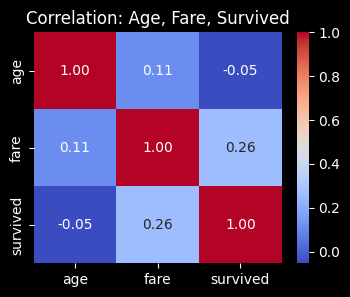

In [13]:
# Select relevant numeric columns
corr_cols = ['age', 'fare', 'survived']

# Drop rows with missing Age or Fare for fair comparison
corr_df = df[corr_cols].dropna()

corr_matrix = corr_df.corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation: Age, Fare, Survived')
plt.show()

## 10. Advanced family-size feature engineering
Create a `FamSizeNoSelf` feature (SibSp + Parch) and study survival for solo travelers vs families.

                     mean  count
FamilyGroup                     
SmallFamily(2)   0.552795    161
LargeFamily(3+)  0.466321    193
Solo             0.303538    537


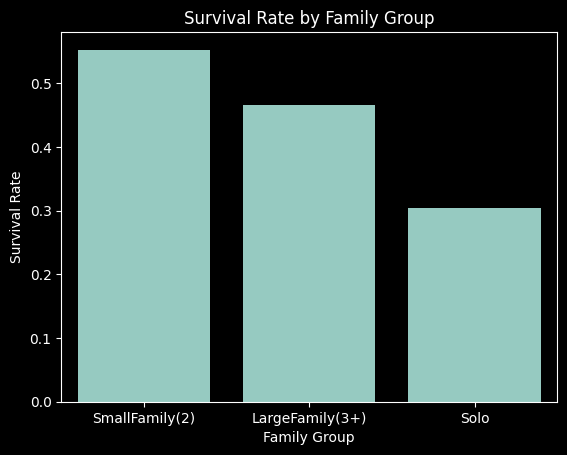

In [14]:
# Family size excluding self
df['FamSizeNoSelf'] = df['sibsp'] + df['parch']

# Define categories
conditions = [
    df['FamSizeNoSelf'] == 0,
    df['FamSizeNoSelf'] == 1,
    df['FamSizeNoSelf'] >= 2
]
labels = ['Solo', 'SmallFamily(2)', 'LargeFamily(3+)']

df['FamilyGroup'] = np.select(conditions, labels)

# Survival rate by family group
family_group_survival = df.groupby('FamilyGroup')['survived'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print(family_group_survival)

sns.barplot(x=family_group_survival.index, y=family_group_survival['mean'])
plt.ylabel('Survival Rate')
plt.xlabel('Family Group')
plt.title('Survival Rate by Family Group')
plt.show()